Import our dependencies and initialize counters and an empty list that will hold the weather data.
Loop through the cities list.
Group the cities in sets of 50 to log the process as we find the weather data for each city.
Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
Build the city_url or endpoint for each city.
Log the URL and the record and set numbers.
Make an API request for each city.
Parse the JSON weather data for the following:
City, country, and date
Latitude and longitude
Maximum temperature
Humidity
Cloudiness
Wind speed
Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-joseph
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | pangnirtung
Processing Record 7 of Set 1 | khash
Processing Record 8 of Set 1 | hofn
Processing Record 9 of Set 1 | mae ramat
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | mehamn
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | willowick
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | lavrentiya
Processing Record 20 of Set 1 | najran
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | hilo
Processi

Processing Record 39 of Set 4 | japura
Processing Record 40 of Set 4 | saint-nazaire
Processing Record 41 of Set 4 | korla
Processing Record 42 of Set 4 | severo-kurilsk
Processing Record 43 of Set 4 | ilulissat
Processing Record 44 of Set 4 | garwa
Processing Record 45 of Set 4 | yirol
City not found. Skipping...
Processing Record 46 of Set 4 | axim
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | sao jose da coroa grande
Processing Record 49 of Set 4 | atkarsk
Processing Record 50 of Set 4 | kuytun
Processing Record 1 of Set 5 | pyay
Processing Record 2 of Set 5 | torbat-e jam
Processing Record 3 of Set 5 | pamyat parizhskoy kommuny
Processing Record 4 of Set 5 | amderma
City not found. Skipping...
Processing Record 5 of Set 5 | luderitz
Processing Record 6 of Set 5 | nemuro
Processing Record 7 of Set 5 | meridian
Processing Record 8 of Set 5 | aquiraz
Processing Record 9 of Set 5 | thinadhoo
Processing Record 10 of Set 5 | chokurdakh
Processing Record 11 of Set

Processing Record 31 of Set 8 | leshukonskoye
Processing Record 32 of Set 8 | tessalit
Processing Record 33 of Set 8 | ankang
Processing Record 34 of Set 8 | katsuura
Processing Record 35 of Set 8 | ahipara
Processing Record 36 of Set 8 | madaoua
Processing Record 37 of Set 8 | shuya
Processing Record 38 of Set 8 | goundi
Processing Record 39 of Set 8 | gondanglegi
Processing Record 40 of Set 8 | sadovoye
Processing Record 41 of Set 8 | west wendover
Processing Record 42 of Set 8 | borovskiy
Processing Record 43 of Set 8 | zhigansk
Processing Record 44 of Set 8 | biloela
Processing Record 45 of Set 8 | stornoway
Processing Record 46 of Set 8 | dubuque
Processing Record 47 of Set 8 | kurilsk
Processing Record 48 of Set 8 | lapua
Processing Record 49 of Set 8 | simbahan
Processing Record 50 of Set 8 | macenta
Processing Record 1 of Set 9 | harper
Processing Record 2 of Set 9 | gondar
Processing Record 3 of Set 9 | kazalinsk
City not found. Skipping...
Processing Record 4 of Set 9 | pimen

Processing Record 20 of Set 12 | jahrom
City not found. Skipping...
Processing Record 21 of Set 12 | contamana
Processing Record 22 of Set 12 | muros
Processing Record 23 of Set 12 | selestat
Processing Record 24 of Set 12 | chimbote
Processing Record 25 of Set 12 | luba
Processing Record 26 of Set 12 | aswan
Processing Record 27 of Set 12 | myitkyina
Processing Record 28 of Set 12 | nongpoh
Processing Record 29 of Set 12 | rodrigues alves
Processing Record 30 of Set 12 | sao filipe
Processing Record 31 of Set 12 | kimberley
Processing Record 32 of Set 12 | ihiala
Processing Record 33 of Set 12 | xai-xai
Processing Record 34 of Set 12 | aflu
City not found. Skipping...
Processing Record 35 of Set 12 | yeppoon
Processing Record 36 of Set 12 | kangaatsiaq
Processing Record 37 of Set 12 | kuching
Processing Record 38 of Set 12 | aloleng
Processing Record 39 of Set 12 | toliary
City not found. Skipping...
Processing Record 40 of Set 12 | souillac
Processing Record 41 of Set 12 | el cope
Pr

In [8]:
len(city_data)

590

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Joseph,-21.3667,55.6167,71.98,77,39,6.38,RE,2021-08-02 14:07:10
1,Qaanaaq,77.4840,-69.3632,43.72,69,100,7.25,GL,2021-08-02 14:07:10
2,Rikitea,-23.1203,-134.9692,68.95,54,99,22.55,PF,2021-08-02 14:05:09
3,Saint-Philippe,-21.3585,55.7679,72.99,76,54,8.59,RE,2021-08-02 14:07:11
4,Pangnirtung,66.1451,-65.7125,51.85,76,100,4.79,CA,2021-08-02 14:07:11
5,Khash,28.2211,61.2158,94.39,9,49,13.33,IR,2021-08-02 14:07:11
6,Hofn,64.2539,-15.2082,54.03,90,100,10.69,IS,2021-08-02 14:07:12
7,Mae Ramat,16.9840,98.5166,74.17,100,100,2.51,TH,2021-08-02 14:07:12
8,Carnarvon,-24.8667,113.6333,50.07,38,0,10.36,AU,2021-08-02 14:04:49
9,Ushuaia,-54.8000,-68.3000,36.10,86,40,7.14,AR,2021-08-02 14:02:45


In [10]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Joseph,RE,2021-08-02 14:07:10,-21.3667,55.6167,71.98,77,39,6.38
1,Qaanaaq,GL,2021-08-02 14:07:10,77.4840,-69.3632,43.72,69,100,7.25
2,Rikitea,PF,2021-08-02 14:05:09,-23.1203,-134.9692,68.95,54,99,22.55
3,Saint-Philippe,RE,2021-08-02 14:07:11,-21.3585,55.7679,72.99,76,54,8.59
4,Pangnirtung,CA,2021-08-02 14:07:11,66.1451,-65.7125,51.85,76,100,4.79
5,Khash,IR,2021-08-02 14:07:11,28.2211,61.2158,94.39,9,49,13.33
6,Hofn,IS,2021-08-02 14:07:12,64.2539,-15.2082,54.03,90,100,10.69
7,Mae Ramat,TH,2021-08-02 14:07:12,16.9840,98.5166,74.17,100,100,2.51
8,Carnarvon,AU,2021-08-02 14:04:49,-24.8667,113.6333,50.07,38,0,10.36
9,Ushuaia,AR,2021-08-02 14:02:45,-54.8000,-68.3000,36.10,86,40,7.14


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

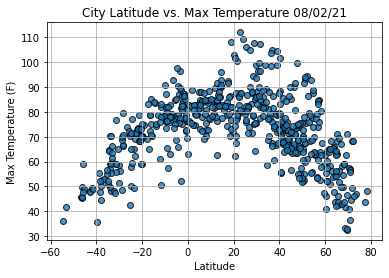

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

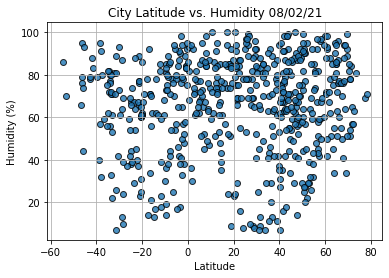

In [14]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

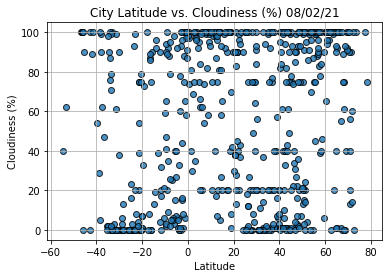

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

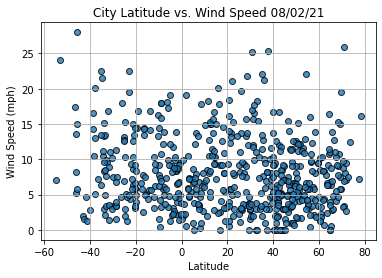

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City               Cabo San Lucas
Country                        MX
Date          2021-08-02 14:07:14
Lat                       22.8909
Lng                     -109.9124
Max Temp                    87.51
Humidity                       55
Cloudiness                     43
Wind Speed                   7.76
Name: 13, dtype: object

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Qaanaaq,GL,2021-08-02 14:07:10,77.4840,-69.3632,43.72,69,100,7.25
4,Pangnirtung,CA,2021-08-02 14:07:11,66.1451,-65.7125,51.85,76,100,4.79
5,Khash,IR,2021-08-02 14:07:11,28.2211,61.2158,94.39,9,49,13.33
6,Hofn,IS,2021-08-02 14:07:12,64.2539,-15.2082,54.03,90,100,10.69
7,Mae Ramat,TH,2021-08-02 14:07:12,16.9840,98.5166,74.17,100,100,2.51


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

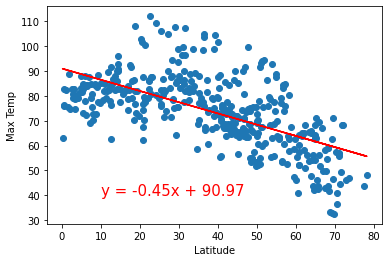

LinregressResult(slope=-0.45157404071194623, intercept=90.97239738248322, rvalue=-0.6225149600016069, pvalue=1.8180162199973878e-45, stderr=0.02807124978680272, intercept_stderr=1.2033038184537825)


In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
result = linregress(x_values, y_values)
print(result)

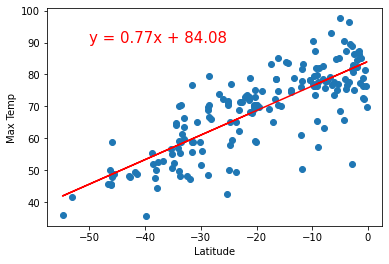

LinregressResult(slope=0.7689620063725874, intercept=84.07884303623533, rvalue=0.797685892192538, pvalue=9.991257970859757e-41, stderr=0.04369747343810935, intercept_stderr=1.042465801256476)


In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))
result = linregress(x_values, y_values)
print(result)

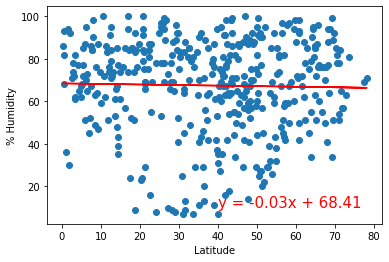

LinregressResult(slope=-0.026282449105652694, intercept=68.41404381053572, rvalue=-0.023280671502480015, pvalue=0.637927456978912, stderr=0.0558072923229041, intercept_stderr=2.3922386234932804)


In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))
result = linregress(x_values, y_values)
print(result)

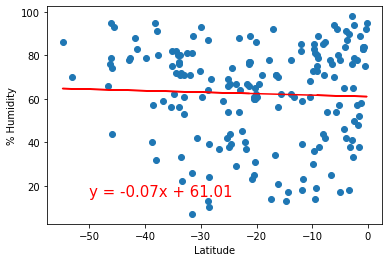

LinregressResult(slope=-0.0678985581085293, intercept=61.00549791733489, rvalue=-0.040621189968250516, pvalue=0.5892729395984024, stderr=0.12553437666161243, intercept_stderr=2.994802313619581)


In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))
result = linregress(x_values, y_values)
print(result)

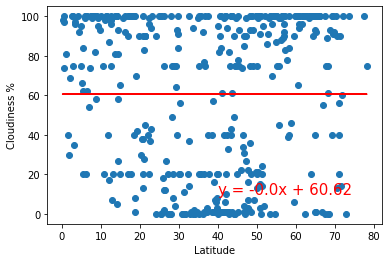

LinregressResult(slope=-0.0005677302415931796, intercept=60.61528412251116, rvalue=-0.00028219906835184807, pvalue=0.995449181822116, stderr=0.09947748152703137, intercept_stderr=4.264207482059399)


In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness %', 'Cloudiness %',(40,10))
result = linregress(x_values, y_values)
print(result)

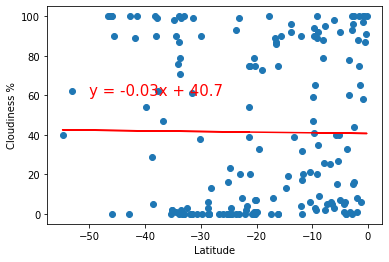

LinregressResult(slope=-0.03316502384650582, intercept=40.69973626530867, rvalue=-0.011123477911457895, pvalue=0.8825132779937452, stderr=0.22409192861000982, intercept_stderr=5.3460338443688835)


In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness %', 'Cloudiness %',(-50,60))
result = linregress(x_values, y_values)
print(result)

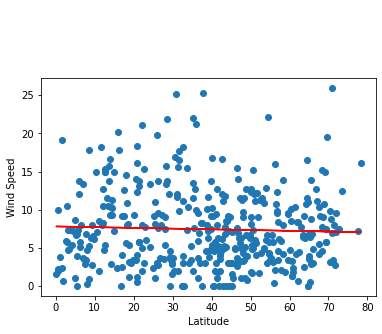

LinregressResult(slope=-0.009565813445008443, intercept=7.804819943315783, rvalue=-0.037416744849419335, pvalue=0.44934384805643557, stderr=0.012632520990568219, intercept_stderr=0.5415063760999594)


In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))
result = linregress(x_values, y_values)
print(result)

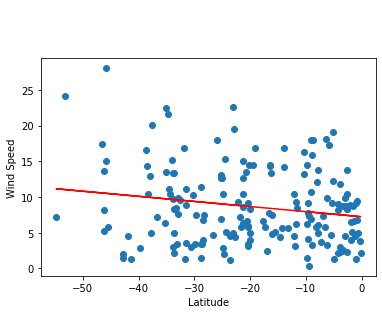

LinregressResult(slope=-0.07140800585662985, intercept=7.236984368033219, rvalue=-0.18058873823411822, pvalue=0.015558561864839447, stderr=0.029232764683713563, intercept_stderr=0.6973894612490894)


In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
result = linregress(x_values, y_values)
print(result)